In [1]:
import torch
from torch_sampling import reservoir_sampling

# Checking the non-contiguous tensors

In [2]:
x = torch.arange(10)
y = x[::3]

tensor([0, 3, 6, 9])

In [4]:
for t in [x, y]:
    print(t.is_contiguous())

True
False


In [10]:
k=3
for _ in range(5):
    print(reservoir_sampling(y, k))

tensor([0, 9, 6])
tensor([0, 3, 9])
tensor([9, 3, 6])
tensor([0, 3, 9])
tensor([9, 3, 6])


# Check performance for multi-d tensors

In [11]:
x = torch.arange(10**4).view(-1, 2)
n = x.size(0)
k = 3
idx = torch.arange(n)

In [13]:
%timeit x[torch.randperm(n)[:k]]

90.5 µs ± 170 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [14]:
%timeit x[reservoir_sampling(idx, k)]

21.8 µs ± 345 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Checking the performance

In [12]:
x = torch.arange(10**4).float()

# Case 1: k big

In [13]:
k = 9000

In [14]:
%timeit choice.choice(x, k)

38.9 µs ± 268 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
%timeit x[torch.randperm(x.numel())[:k]]

237 µs ± 6.69 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Case 2: k small

In [16]:
k = 100

In [17]:
%timeit choice.choice(x, k)

16.8 µs ± 213 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [18]:
%timeit x[torch.randperm(x.numel())[:k]]

172 µs ± 1.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Case 3: k medium

In [19]:
k = 4500

In [20]:
%timeit choice.choice(x, k)

107 µs ± 3.22 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
%timeit x[torch.randperm(x.numel())[:k]]

204 µs ± 4.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Checking distributions

In [19]:
import matplotlib.pyplot as plt
x = torch.arange(10).float()

In [20]:
k = 8
samples = []
for _ in range(10000):
    samples.extend(choice.choice(x, k).numpy())

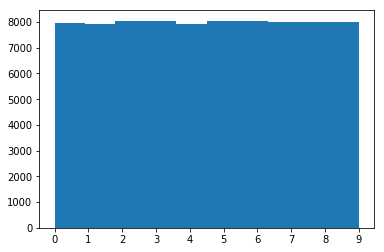

In [21]:
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()

In [22]:
k = 2
samples = []
for _ in range(10000):
    samples.extend(choice.choice(x, k).numpy())

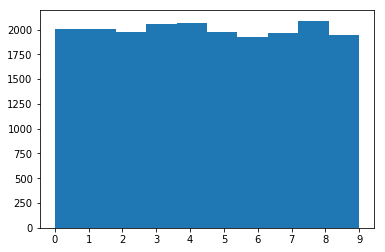

In [23]:
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()